In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras


2022-05-04 16:11:10.236716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 16:11:10.236751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
import mlnotify
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20)

2022-05-04 16:11:14.000395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 16:11:14.001064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 16:11:14.001102: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-04 16:11:14.001133: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-04 16:11:14.001163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

                                     
                                     
    █▀▀▀▀▀█ ▀▀▀█▄ ▀ █▀█▄  █▀▀▀▀▀█    
    █ ███ █  ▀▄█ ██ ▄▄▄█▄ █ ███ █    
    █ ▀▀▀ █  ▄▀█▀ ▄ █ ▀▀  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ █▄▀ █▄▀▄█ █ █ ▀▀▀▀▀▀▀    
    ██ ██▄▀  ▀▄ ▀▄ ▄▀▀▄█▀▄▀▄▄ ▄▄▀    
    ▀▀ ▀▄█▀▀▄▀  ▀ █▀█▄▀▄▄ ▄  ▄▀ ▄    
    █▄▄█ ▄▀  ██ ▄▄▀▄█▄▄ ▀ ██▄▄▄▄█    
    ▄▄ ██▄▀█▄█▀ ▄  █▀▀ ▀▄█▄▄  █ █    
    █ ██▀▄▀██▀▄█▀▀█▄  ▄▄▄  ▀▄▀▄▄     
    ██▄▄▀▄▀ ██ ▄▀▄▀▀ ▀ █▄ ██▀█▄ ▀    
    ▀▀  ▀ ▀▀▄▀▀▀▄  ▄▀██▀█▀▀▀██▀▀     
    █▀▀▀▀▀█  ▀▄█▄▀ ▀█▄ ██ ▀ █▀ ▄     
    █ ███ █ █▀▀▀▀▄▀██  █▀█▀▀▀▀ ▀▄    
    █ ▀▀▀ █ ▄▀██▀▀▄██ ▄ ▀  ██▄█▀█    
    ▀▀▀▀▀▀▀ ▀▀  ▀ ▀▀▀   ▀            
                                     
                                     
https://mlnotify.aporia.com/training/593360

Scan the QR code or enter the url to get a notification when your training is done


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5716 - accuracy: 0.8788
Epoch 2/20
1875/1875 [========================

In [5]:
# try searching the optimal learning rate by growing the learning rate exponentially
# and observing the loss curve
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.1),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

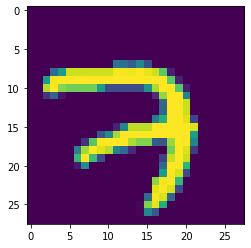

In [8]:
plt.imshow(X_train[0])
plt.show()

In [9]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_end(self, epoch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, K.get_value(self.model.optimizer.lr) * self.factor)


In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [13]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀▄▀ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ █▄█ █▄▀ ▀▀▀▀▀▀▀    
    ██▄▄ ▀▀█▄▀█ ▀▀ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    ▀▀█  ▄▀ ▀▀▄█▀ ▀▀▀▀▀▄█  █ ▄       
      █▄▄▄▀▄▀▀█ ▄ █▄█▄▄▄█ ██▄  ▄█    
    ▄▄█▄▀ ▀███  ▄▀██ ▀  ▄██▄ ▀█ ▄    
    ▄▄█▀▄█▀ █▀█ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀▄▄▄█▀▄   ▄▀▀▄▀ ▀ ▀  ██▀▀  ▀    
    ▀ ▀▀  ▀ ██▀▀▄▀ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ █▀  ▄ ▀▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █   █▀▀ ███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄ ▀█▀  █▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀▀▀▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/346541

Scan the QR code or enter the url to get a notification when your training is done


1719/1719 [==============================] - 9s 5ms/step - loss: 1.8046 - accuracy: 0.5294 - val_loss: 1.2379 - val_accuracy: 0.7800


/tmp/ipykernel_4830/2891158959.py:4: UserWarning: Attempting to set identical left == right == 0.0010000000474974513 results in singular transformations; automatically expanding.
  plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])


Text(0, 0.5, 'Loss')

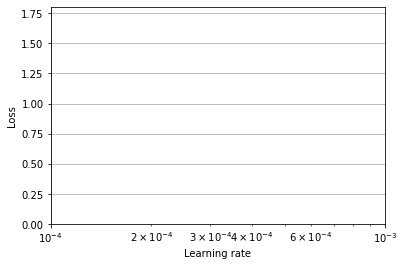

In [14]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [18]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [19]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

                                     
                                     
    █▀▀▀▀▀█  ▀▀█▄▄█ █▀█ ▄ █▀▀▀▀▀█    
    █ ███ █ ▄▀██ ▄█ █▄▄▄▄ █ ███ █    
    █ ▀▀▀ █ ▀▄█ ▀ ▀ ▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀▄▀ █ ▀▄█ █▄▀ ▀▀▀▀▀▀▀    
    ▀█ ▄ █▀█▄▀█ ▀█ ▄ ▀▄▄▀▄ ▄█▀▄▄     
    ▀▄▄▀▀▀▀██▀▄█▀  ▀▀▀▀▄█  █ ▄       
    ▄▀▀▀▄ ▀██▀█ ▄ █▄█▄▄▄█ ██▄  ▄█    
    ▄ ▀▄█▄▀█▀ ▄ ▄▀ █ ▀  ▄██▄ ▀█ ▄    
    █▀▀▀ █▀▀▀▄█ ▀▀▄▄▄█▄▄█ ▄▄▄▀█▄▄    
    █▀▀ ▀▀▀█▀█▀▄▀▀█▀ ▀ ▀  ██▀▀  ▀    
    ▀  ▀▀ ▀ █▀█▀▄█ ▄ ██ █▀▀▀█▄▀▀▀    
    █▀▀▀▀▀█ ██▄ ▄  ▀▀▀ ██ ▀ █▀▀▄▄    
    █ ███ █  █▀▀▀▄███  ▀██▀▀▀█▄▀▄    
    █ ▀▀▀ █ ▄▄▀█▀ ▄█▄ ▄▀▀ ▀████▀▄    
    ▀▀▀▀▀▀▀ ▀  ▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/083188

Scan the QR code or enter the url to get a notification when your training is done


Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2363 - accuracy: 0.9264 - val_loss: 0.0972 - val_accuracy: 0.9720
Epo

In [21]:
%load_ext tensorboard

%tensorboard --logdir=./my_mnist_logs --port=6006